## Modelo de nudo de trebol de línea Nodal

Consultar: [Ren Bi et al.](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.96.201305)

El modelo para el nudo de trebol está asociado con los enteros p=3 y q=2, el polinomio asociado al modelo continuo es:
\begin{align} 
a_1(m,\vec{k})=&k_x^3-3k_xk_y^2+k_z^2-(m-\frac{1}{2}k^2)^2 \\
 a_3(m,\vec{k})=&-k_y^3+3k_yk_x^2+2k_z(m-\frac{1}{2}k^2)
\end{align}
Entonces para proponer el modelo de red, tomamos:
\begin{align}
	a_1(m_0,\vec{k})=&\sin{k_x}(1-\cos{k_x})-3\sin{k_x}(1-\cos{k_y})+\sin^2{k_z}-(\sum_j\cos{k_j}-m_0)^2\\
	a_3(m_0,\vec{k})=&-\sin{k_y}(1-\cos{k_y})+3\sin{k_y}(1-\cos{k_x})+2\sin{k_z}(\sum_j\cos{k_j}-m_0)
\end{align}
Ahora expresamos el modelo de red en terminos de senos y cosenos en suma de ángulos:
\begin{align}
     a_1=&-2\sin{k_x}-\frac{1}{2}\sin{2k_x}+\frac{3}{2}(\sin{(k_x+k_y)}+\sin{(k_x-k_y)})+\bigg(\sin^2{k_z}-\sum_j\cos^2{k_j}\bigg)\\
     &-(\cos{(k_x+k_y)}+\cos{(k_x-k_y)}+\cos{(k_x+k_z)}+\cos{(k_x-k_z)}+\cos{(k_z+k_y)}\\
     &+\cos{(k_z-k_y)})+2m_0\sum_j\cos{k_j}-m_0^2\\
     =&-2\sin{k_x}-\frac{1}{2}\sin{2k_x}+\frac{3}{2}(\sin{(k_x+k_y)}+\sin{(k_x-k_y)})+\bigg( -1-\frac{(\cos{2k_x}+\cos{2k_y})}{2}-\cos{2k_z} \bigg)\\
     &-(\cos{(k_x+k_y)}+\cos{(k_x-k_y)}+\cos{(k_x+k_z)}+\cos{(k_x-k_z)}+\cos{(k_z+k_y)}\\
     &+\cos{(k_z-k_y)})+2m_0\sum_j\cos{k_j}-m_0^2\\
        a_3=&2\sin{k_y}+\frac{1}{2}\sin{2k_y}-\frac{3}{2}(\sin{(k_x+k_y)}+\sin{(k_y-k_x)})+\sum_j(\sin{(k_z+k_j)}+\sin{(k_z-k_j)}) -2m_0\sin{k_z}
\end{align}

In [1]:
from pylab import *
from scipy.optimize import fsolve
from pythtb import *
from multiprocessing import Pool
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
%matplotlib notebook

### Energías de Fermi en el bulto (Fermi Energy for Bulk Hamiltonian)

In [2]:
# Definimos las funciones donde queremos calcular los nodos
# Estas funciones están dados por el hamiltoniano de Bloch 
# fenx es la función para hallar el nodo [k_y,k_z] que está asociado al discretizar k_x
def fenx(k,k_x,m0=2.8, mz=0):
    suma =  cos(k_x) + cos(k[0]) + cos(k[1]) - m0
    a1 = -2*sin(k_x)-0.5*sin(2*k_x)+3*sin(k_x)*cos(k[0])+sin(k[1])*sin(k[1])-suma*suma
    a3 = 2*sin(k[0])+0.5*sin(2*k[0])-3*sin(k[0])*cos(k_x)+2*sin(k[1])*suma+mz
    return [a1, a3]
# feny es la función para hallar el nodo [k_x,k_z] que está asociado al discretizar k_y
def feny(k,k_y,m0=2.8, mz=0):
    suma =  cos(k[0]) + cos(k_y) + cos(k[1]) - m0
    a1 = -2*sin(k[0])-0.5*sin(2*k[0])+3*sin(k[0])*cos(k_y)+sin(k[1])*sin(k[1])-suma*suma
    a3 = 2*sin(k_y)+0.5*sin(2*k_y)-3*sin(k_y)*cos(k[0])+2*sin(k[1])*suma+mz
    return [a1, a3]
# fenz es la función para hallar el nodo [k_x,k_y] que está asociado al discretizar k_z
def fenz(k,k_z,m0=2.8, mz=0):
    suma =  cos(k_z) + cos(k[0]) + cos(k[1]) - m0
    a1 = -2*sin(k[0])-0.5*sin(2*k[0])+3*sin(k[0])*cos(k[1])+sin(k_z)*sin(k_z)-suma*suma
    a3 = 2*sin(k[1])+0.5*sin(2*k[1])-3*sin(k[1])*cos(k[0])+2*sin(k_z)*suma+mz
    return [a1, a3]

In [3]:
# creamos una funcion que genere una malla de nodos
def Nodos(NN, m0=2.8,mz=0):
    k_j=linspace(-pi, pi, NN)
    #Definimos un punto inicial para el calculo de raices
    k0 = [[-3.2, 3.2],[3.2,-3.2],[2,0],[2,2],[-2,2],[2,-2],[-0.0025,0.0025],[0.0025,-0.0025]]  
    #Una variable que guarde los puntos
    mesh = []
    #Calculamos los nodos para x discretizado
    for j in range(len(k_j)):
        K = []
        for i in range(len(k0)):
            root = fsolve(fenx,k0[i],args=(k_j[j],m0,mz))
            flag1 = isclose(fenx(root,k_j[j],m0,mz),[0,0])
            if flag1[0] == True and flag1[1] == True:
                while abs(root[0]) > pi:
                        if root[0] > 0:
                            root[0]-=2*pi
                        else:
                            root[0]+=2*pi
                while abs(root[1]) > pi:
                        if root[1] > 0:
                            root[1]-=2*pi
                        else:
                            root[1]+=2*pi
                k_y, k_z = root
                k = [k_j[j], k_y, k_z]
                K.append(k)    
        # Eliminamos las raíces iguales
        for m in range(len(K)):
            l=0
            for n in range(len(K)):
                if m != n and n > m:
                    flag = isclose(K[m],K[n])
                    if flag[1] == True and flag[2] == True:
                        l+=1
            if l == 0:
                mesh.append(K[m])
    #Calculamos los nodos para y discretizado
    for j in range(len(k_j)):
        K = []
        for i in range(len(k0)):
            root = fsolve(feny,k0[i],args=(k_j[j],m0,mz))
            flag1 = isclose(feny(root,k_j[j],m0,mz),[0,0])
            if flag1[0] == True and flag1[1] == True:
                while abs(root[0]) > pi:
                        if root[0] > 0:
                            root[0]-=2*pi
                        else:
                            root[0]+=2*pi
                while abs(root[1]) > pi:
                        if root[1] > 0:
                            root[1]-=2*pi
                        else:
                            root[1]+=2*pi
                k_x, k_z = root
                k = [k_x, k_j[j], k_z]
                K.append(k)
        # Eliminamos las raíces iguales
        for m in range(len(K)):
            l=0
            for n in range(len(K)):
                if m != n and n > m:
                    flag = isclose(K[m],K[n])
                    if flag[1] == True and flag[2] == True:
                        l+=1
            if l == 0:
                mesh.append(K[m])
    #calculamos los nodos para z discretizado
    for j in range(len(k_j)):
        K = []
        for i in range(len(k0)):
            root = fsolve(fenz,k0[i],args=(k_j[j],m0,mz))
            flag1 = isclose(fenz(root,k_j[j],m0,mz),[0,0])
            if flag1[0] == True and flag1[1] == True:
                while abs(root[0]) > pi:
                        if root[0] > 0:
                            root[0]-=2*pi
                        else:
                            root[0]+=2*pi
                while abs(root[1]) > pi:
                        if root[1] > 0:
                            root[1]-=2*pi
                        else:
                            root[1]+=2*pi
                k_x, k_y = root
                k = [k_x, k_y, k_j[j]]
                K.append(k)
            
        # Eliminamos las raíces iguales
        for m in range(len(K)):
            l=0
            for n in range(len(K)):
                if m != n and n > m:
                    flag = isclose(K[m],K[n])
                    if flag[1] == True and flag[2] == True:
                        l+=1
            if l == 0:
                mesh.append(K[m])
                
        
    #Eliminanos los nodos iguales
    Mesh = []
    for m in range(len(mesh)):
        l = 0
        for n in range(len(mesh)):
            if m != n and n > m:
                flag = isclose(mesh[m],mesh[n])
                if flag[0] == True and flag[1] == True and flag[2] == True:
                        l+=1
        if l== 0:
            Mesh.append(mesh[m])
    
    return array(Mesh)

No hay Estados con E=0 para $m_0$=3.2


<IPython.core.display.Javascript object>


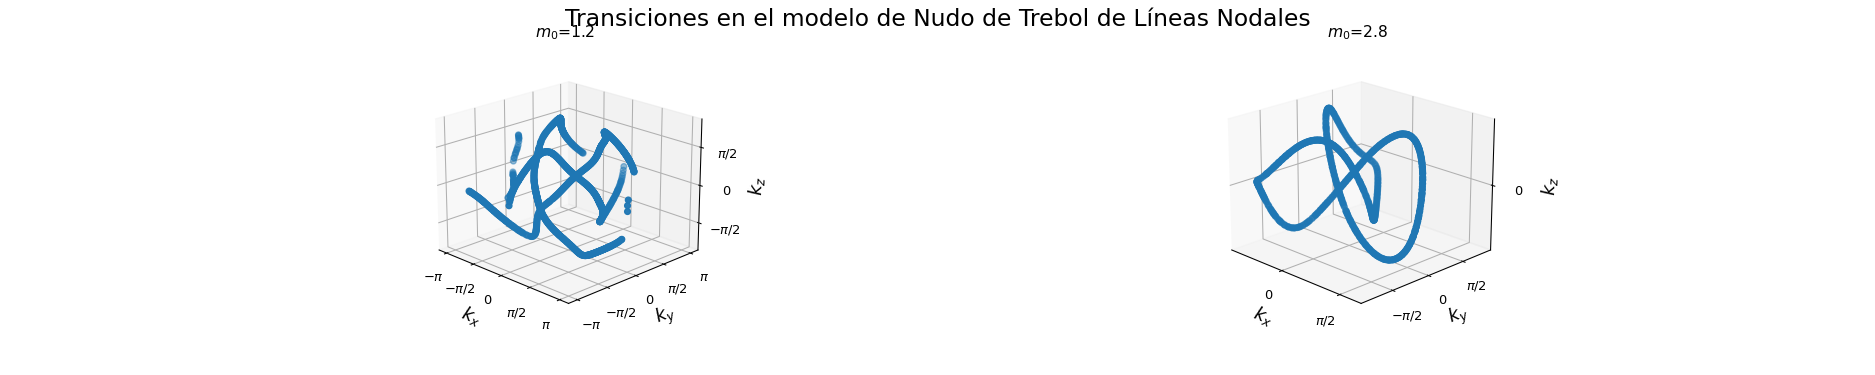

CPU times: user 45.6 s, sys: 236 ms, total: 45.8 s
Wall time: 45.4 s


In [9]:
%%time
# Generamos los puntos que nos dan Energía cero en nuestro hamiltoniano continuo
# Exploración de las energías de Fermi para E=0,con distinto parametro m0
NN = 101
m0 = [ 1.2, 2.8, 3.2]
mesh = []
l=0
for i in range(len(m0)):
    mesh1=Nodos( NN, m0[i], 0)
    if ( len( mesh1) != 0):
        mesh1tb = mesh1 / (2*pi)
        mesh.append(mesh1tb)
        l+=1
    else :
        print(f'No hay Estados con E=0 para $m_0$={m0[i]}')
# Generamos un subplot de los nodos en el espacio de momentos
fig = plt.figure(figsize=(20, 4), dpi=100)
fig.tight_layout(pad=0.4, w_pad=2.0, h_pad=2.0)
fig.suptitle('Transiciones en el modelo de Nudo de Trebol de Líneas Nodales', fontsize = 18)
for i in range(l):
    i_1= i + 1
    ax = fig.add_subplot(1, l , i_1, projection='3d')
    ax.scatter( mesh[i].T[0], mesh[i].T[1], mesh[i].T[2])
    ax.set_title(f'$m_0$={m0[i]}')
    ax.set_xlabel('$k_x$', fontsize = 14)
    ax.set_xticks([-0.5, -0.25, 0, 0.25, 0.5])
    ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'0', r'$\pi/2$', r'$\pi$'])
    ax.set_ylabel('$k_y$', fontsize = 14)
    ax.set_yticks([-0.5, -0.25, 0, 0.25, 0.5])
    ax.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'0', r'$\pi/2$', r'$\pi$'])
    ax.set_zlabel('$k_z$', fontsize = 14)
    ax.set_zticks([-0.5, -0.25, 0, 0.25, 0.5])
    ax.set_zticklabels([r'$-\pi$', r'$-\pi/2$', r'0', r'$\pi/2$', r'$\pi$'])
    ax.view_init(20,-45)
fig.savefig("TransicionesTrNLsinMasa.pdf")

<IPython.core.display.Javascript object>


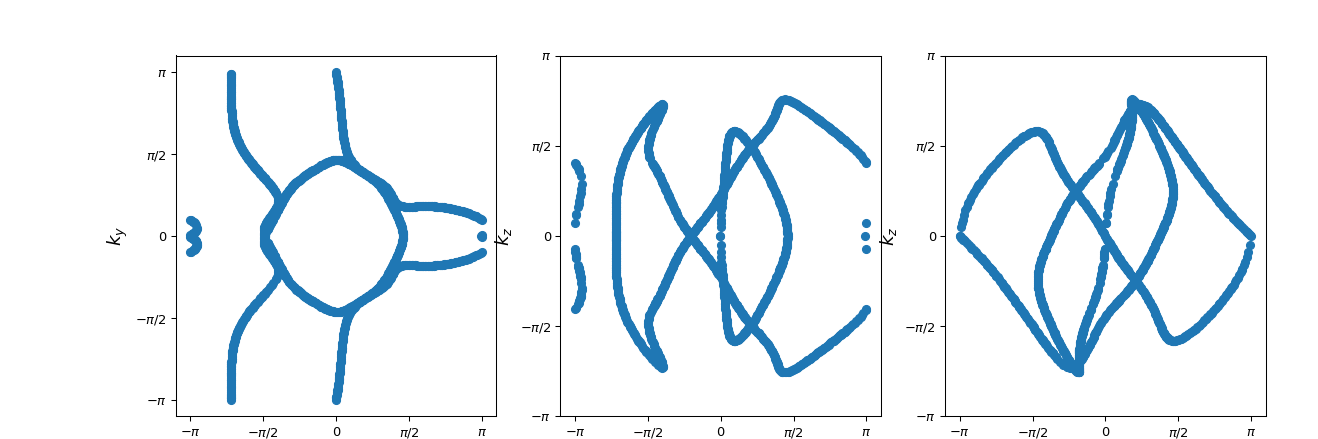

In [16]:
#Proyecciones de las superficies de Fermi en los planos canonicos 
fig = plt.figure(figsize=(15, 5), dpi=100)
fig.tight_layout(pad=0.4, w_pad=2.0, h_pad=2.0)
X=['x', 'y', 'z']
l = len(X)
k=1
for m0 in range( len(mesh)):
    for i in range( l):
        for j in range( l):
            if (j > i ):
                ax = fig.add_subplot(1, l, k)
                ax.scatter( mesh[m0].T[i],mesh[m0].T[j])
                ax.set_xlabel(f'$k_{X[i]}$', fontsize = 14)
                ax.set_xticks([-0.5, -0.25, 0, 0.25, 0.5])
                ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'0', r'$\pi/2$', r'$\pi$'])
                ax.set_ylabel(f'$k_{X[j]}$', fontsize = 14)
                ax.set_yticks([-0.5, -0.25, 0, 0.25, 0.5])
                ax.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'0', r'$\pi/2$', r'$\pi$'])
                k+=1

    fig.savefig(f'FBSTrNL_m{m0}_mz0.png', bbox_inches ='tight')
    plt.show()

In [ ]:
%%time
# Generamos los puntos que nos dan Energía cero en nuestro hamiltoniano continuo
# Exploración de las energías de Fermi para E=0,con distinto parametro mz
NN = 101
mz = [ 0.045, 0.058, 0.06, 0.07]
mesh = []
l=0
for i in range(len(mz)):
    mesh1=Nodos(201, 2.8,mz[i])
    if ( len( mesh1) != 0):
        mesh1tb = mesh1 / (2*pi)
        mesh.append(mesh1tb)
        l+=1
    else :
        print(f'No hay Estados con E=0 para $m_z$={mz[i]}')
# Generamos un subplot de los nodos en el espacio de momentos
fig = plt.figure(figsize=(20, 4), dpi=100)
fig.tight_layout(pad=0.4, w_pad=2.0, h_pad=2.0)
fig.suptitle('Transiciones en el modelo de Nudo de Trebol de Líneas Nodales $m_0=2.8$', fontsize = 18)
for i in range(l):
    i_1= i + 1
    ax = fig.add_subplot(1, l , i_1, projection='3d')
    ax.scatter( mesh[i].T[0], mesh[i].T[1], mesh[i].T[2])
    ax.set_title(f'$m_0$={m0[i]}')
    ax.set_xlabel('$k_x$', fontsize = 14)
    ax.set_xticks([-0.5, -0.25, 0, 0.25, 0.5])
    ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'0', r'$\pi/2$', r'$\pi$'])
    ax.set_ylabel('$k_y$', fontsize = 14)
    ax.set_yticks([-0.5, -0.25, 0, 0.25, 0.5])
    ax.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'0', r'$\pi/2$', r'$\pi$'])
    ax.set_zlabel('$k_z$', fontsize = 14)
    ax.set_zticks([-0.5, -0.25, 0, 0.25, 0.5])
    ax.set_zticklabels([r'$-\pi$', r'$-\pi/2$', r'0', r'$\pi/2$', r'$\pi$'])
    ax.view_init(20,-45)
fig.savefig(f'TransicionesTrNLMasa28_mz{i}.pdf')

In [ ]:
#Proyecciones de las superficies de Fermi en los planos canonicos 
fig = plt.figure(figsize=(15, 5), dpi=100)
fig.tight_layout(pad=0.4, w_pad=2.0, h_pad=2.0)
X=['x', 'y', 'z']
l = len(X)
k=1
for mz in range( len(mesh)):
    for i in range( l):
        for j in range( l):
            if (j > i ):
                ax = fig.add_subplot(1, l, k)
                ax.scatter( mesh[m0].T[i],mesh[m0].T[j])
                ax.set_xlabel(f'$k_{X[i]}$', fontsize = 14)
                ax.set_xticks([-0.5, -0.25, 0, 0.25, 0.5])
                ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'0', r'$\pi/2$', r'$\pi$'])
                ax.set_ylabel(f'$k_{X[j]}$', fontsize = 14)
                ax.set_yticks([-0.5, -0.25, 0, 0.25, 0.5])
                ax.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'0', r'$\pi/2$', r'$\pi$'])
                k+=1

    fig.savefig(f'FBSTrNL_m{mz}_mz0.png', bbox_inches ='tight')
    plt.show()

### Estados de borde en una direccion finita

In [ ]:
#Construimos nuestro modelo de amarre fuerte con las expresiones exponenciales
def make_tbsyst(a=1.0 ,m0=2.8, mz=0):
    # Construccion del hailtoniano
    # Vectores de red
    lat = [[a,0,0],[0,a,0],[0,0,a]]

    # Posición de los sitio de la red 
    # en términos de los vectores de red
    orb = [[0,0,0],[1/2,1/2,1/2]]

    # Se genera un modelo de: Nodal Linked
    # 2 dimensiones en el espacio real
    # 2 dimensiones en el espacio recíproco
    # con los vectores de red lat
    # con orbitales en los sitios orb
    TrNSmK32 = tb_model(3,3,lat,orb)

    # Parámetros del modelo:
    # M, T_2, t_2, m0
    s  = -0.5J
    c  = 0.5
    t_00 = -2*m0*s 
    # Establecer las energías on-site
    TrNSmK32.set_onsite( [ mz, -mz])

    # Establecer los hoppings a primeros vecinos
    # (hopping, sitio i, sitio j, [vector de red de la celda donde se encuentra j])

    # Terminos en la diagonal a_3
    ## sen(k_)
    TrNSmK32.set_hop(2*s,0,0,[ 0, 1, 0]) ## sin k_y 
    TrNSmK32.set_hop(t_00,0,0,[ 0, 0, 1]) ## sin k_z
    ## sen(2k_)
    TrNSmK32.set_hop(0.5*s ,0,0,[ 0, 2, 0])
    TrNSmK32.set_hop(s ,0,0,[ 0, 0, 2])
    ## sen(k_y+...)
    TrNSmK32.set_hop(-1.5*s ,0,0,[ 1, 1, 0]) #k_x + k_y#
    TrNSmK32.set_hop(-1.5*s ,0,0,[ -1, 1, 0])  #k_y - k_x#
    TrNSmK32.set_hop(s ,0,0,[ 0, 1, 1]) #k_y + k_z#
    TrNSmK32.set_hop(s ,0,0,[ 0, -1, 1])   #k_z - k_y#
    TrNSmK32.set_hop(s ,0,0,[ 1, 0, 1]) #k_x + k_z#
    TrNSmK32.set_hop(s ,0,0,[-1, 0, 1])   #k_z - k_x#

    ## sen(k_)
    TrNSmK32.set_hop(-2*s,1,1,[ 0, 1, 0]) ## sin k_y 
    TrNSmK32.set_hop(-t_00,1,1,[ 0, 0, 1]) ## sin k_z
    ## sen(2k_)
    TrNSmK32.set_hop(-0.5*s ,1,1,[ 0, 2, 0])
    TrNSmK32.set_hop(-s ,1,1,[ 0, 0, 2])
    ## sen(k_y+...)
    TrNSmK32.set_hop(1.5*s ,1,1,[ 1, 1, 0]) #k_x + k_y#
    TrNSmK32.set_hop(1.5*s ,1,1,[ -1, 1, 0])  #k_y - k_x#
    TrNSmK32.set_hop(-s ,1,1,[ 0, 1, 1]) #k_y + k_z#
    TrNSmK32.set_hop(-s ,1,1,[ 0, -1, 1])   #k_z - k_y#
    TrNSmK32.set_hop(-s ,1,1,[ 1, 0, 1]) #k_x + k_z#
    TrNSmK32.set_hop(-s ,1,1,[-1, 0, 1])   #k_z - k_x#

    # Terminos fuera de la diagonal a_1
    ## intracell hopping
    TrNSmK32.set_hop(-1-m0**2 ,0,1,[ 0, 0, 0]) 
    ##
    TrNSmK32.set_hop(m0 - 2*s ,0,1,[ 1, 0, 0])
    TrNSmK32.set_hop(m0 + 2*s ,0,1,[ -1, 0, 0])
    TrNSmK32.set_hop(m0 ,0,1,[ 0, 1, 0])
    TrNSmK32.set_hop(m0 ,0,1,[ 0,-1, 0])
    TrNSmK32.set_hop(m0 ,0,1,[ 0, 0, 1])
    TrNSmK32.set_hop(m0 ,0,1,[ 0, 0,-1]) 
    ##  2k...
    TrNSmK32.set_hop(-0.5*(c+s),0,1,[2 , 0, 0])
    TrNSmK32.set_hop(-0.5*(c-s),0,1,[-2 , 0, 0])
    TrNSmK32.set_hop(-0.5*c ,0,1,[0 , 2, 0])
    TrNSmK32.set_hop(-0.5*c ,0,1,[0 , -2, 0])
    TrNSmK32.set_hop( -c ,0,1,[0 , 0, 2])
    TrNSmK32.set_hop( -c ,0,1,[0 , 0,-2])
    ## cos(k_l+ k_m)
    TrNSmK32.set_hop(-c + 1.5*s,0,1,[ 1, 1, 0])
    TrNSmK32.set_hop(-c - 1.5*s ,0,1,[ -1, -1, 0]) ## cos k_x+k_y
    TrNSmK32.set_hop(-c + 1.5*s,0,1,[ 1, -1, 0])
    TrNSmK32.set_hop(-c- 1.5*s ,0,1,[ -1, 1, 0])  ## cos k_x-k_y
    TrNSmK32.set_hop(-c ,0,1,[ 1, 0, 1])
    TrNSmK32.set_hop(-c ,0,1,[ -1, 0, -1]) ## cos k_x+k_z
    TrNSmK32.set_hop(-c ,0,1,[ 1,0 , -1])
    TrNSmK32.set_hop(-c ,0,1,[-1, 0, 1])  ## cos k_x-k_z
    TrNSmK32.set_hop(-c ,0,1,[ 0, 1, 1])
    TrNSmK32.set_hop(-c ,0,1,[ 0, -1, -1])  ## cos k_y+k_z
    TrNSmK32.set_hop(-c ,0,1,[ 0, -1, 1])
    TrNSmK32.set_hop(-c ,0,1,[ 0, 1, -1])  # cos k_y-k_z
    return TrNSmK32

In [ ]:
%%time
proc=Pool()
label  = [ r"$-X$", r"$\Gamma$", r"$X$"]
label2 = [ r"$-Y$", r"$\Gamma$", r"$Y$"]
mz= [ 0, 0.045, 0.058, 0.06, 0.07]
for i in mz:
    ############### Definimos nuestro tight binding model #############
    syst = make_tbsys(1, 2.8, i)
    ############### Iniciamos un subplot ##############################
    fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(15,5))
    fig.tight_layout(pad=2.0)
    fig.suptitle(f'Espectro de bandas para $m_0=2.8$ y $m_z={i}$', fontsize=14)
    
    for j in range(3):
        # sistema finito en la direccion j
        # 200 slabs y condiciones de frontera no periodica
        cut_j_syst = syst.cut_piece( 200, j, glue_edgs=False)
        path = [[-0.5,0.0],[0.0,0.0],[0.5,0.0]]
        k_vec, k_dist, k_node = cut_j_syst.k_path(path,401,report=False)
        Evls = proc.map(cut_j_syst.solve_one,k_vec)
        Evls = array(Evls)
        Evls = Evls.T
        #Es recomendable guardar estos valores
        file = open(f'ev_m28_mz{i}_edge{j}',"w")
        for En in Evls:
            np.savetxt(file, En)
        file.close()
        ################# Graficar el espectro de bandas ################## 
        for n in range( len(Evls)):
            ax[j].plot(k_dist,Evls[n],'-k',alpha=0.2)

        # Colocamos una etiqueta al eje y
        ax[j].set_ylabel("Energía")
        # Colocamos los xticks en los puntos del path
        ax[j].set_xticks(k_node)
        # Dibujamos líneas verticales en cada xtick
        for n in range(len(k_node)):
            ax[j].axvline(x=k_node[n], lw=0.5, color='k')
        # Especificamos los límites de graficación en el eje de las abcisas
        ax[j].set_ylim(-3,3)
        if (j == 0):
            # Colocamos una etiqueta al eje x 
            ax[j].set_xlabel("Camino en el espacio $k_y$")
            # Colocamos las etiquetas de los xticks 
            ax[j].set_xticklabels(label2)
        else :
            # Colocamos una etiqueta al eje x 
            ax[j].set_xlabel("Camino en el espacio $k_x$")
            # Colocamos las etiquetas de los xticks 
            ax[j].set_xticklabels(label)
           
    # Ajustamos los ejes y etiquetas antes de guardar la figura
    fig.tight_layout()
    # Guardamos la figura como un pdf
    fig.savefig(f'BSTreNLm28_mz{i}.pdf')